https://blog.pythonanywhere.com/127/

In [2]:
# PythonAnywhere comes pre-installed with Quandl, so you just need to import it
import quandl

# first, go to quandl.com and search for the ticker symbol that you want
# let's say we want to look at (continuous) front month crude vs e-mini S&Ps


cl = quandl.get('CHRIS/CME_CL1')
es = quandl.get('CHRIS/CME_ES1')

In [3]:
# Quandl.get() returns a pandas dataframe, so you can use all the pandas goodies
# For example, you can use tail to look at the most recent data, just like the unix tail binary!
es.tail()

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
2016-10-05,2144.25,2158.00,2141.00,2153.75,8.50,2153.25,1364517.0,2912290.0
2016-10-06,2153.25,2157.25,2143.25,2155.75,3.25,2156.50,1204885.0,2921730.0
2016-10-07,2155.25,2161.50,2138.00,2146.50,10.00,2146.50,1952389.0,2920563.0
2016-10-10,2152.00,2163.50,2148.50,2159.50,12.50,2159.00,948489.0,2913295.0
2016-10-11,2159.50,2160.75,2121.75,2133.50,24.50,2134.50,2231047.0,2942901.0


In [4]:
# you can also get statistics
es.describe()

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
count,4889.000000,4889.000000,4889.000000,4889.000000,660.000000,4889.000000,4.889000e+03,4.889000e+03
mean,1340.362855,1350.459859,1329.759920,1340.782786,12.652652,1340.760303,1.091591e+06,1.491255e+06
std,336.275582,336.546521,336.088706,336.536850,12.087256,336.488013,9.504445e+05,1.166226e+06
min,674.750000,694.750000,665.750000,676.000000,0.250000,676.000000,0.000000e+00,0.000000e+00
25%,1113.500000,1122.000000,1105.250000,1113.500000,3.750000,1113.500000,2.017570e+05,2.257640e+05
50%,1279.500000,1287.750000,1268.750000,1279.500000,9.250000,1279.500000,8.927340e+05,1.466610e+06
75%,1460.250000,1471.500000,1451.250000,1460.500000,18.500000,1460.500000,1.730421e+06,2.710794e+06
max,2186.000000,2191.500000,2180.500000,2185.500000,100.250000,2186.000000,6.285917e+06,3.594453e+06


In [6]:
# select the rows where Open has missing data points
es[es['Open'].isnull()].head()

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,


In [7]:
es_close = es.Settle  # WHAT IS THIS SORCERY? Attribute access!
es_close.head()

Date
1997-09-09    934.0
1997-09-10    915.0
1997-09-11    908.0
1997-09-12    924.0
1997-09-15    922.0
Name: Settle, dtype: float64

In [8]:
print(type(es))
print(type(es_close))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
# Okay- time to quickly check the crude time series as well
cl.describe()

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
count,8426.000000,8426.000000,8426.000000,8426.000000,669.000000,8426.000000,8.426000e+03,8425.000000
mean,41.828424,42.391808,41.236514,41.832428,1.002093,41.832116,1.196205e+05,129911.474065
std,29.306367,29.683962,28.879005,29.300521,0.821309,29.300386,1.353083e+05,116081.105765
min,10.000000,11.020000,9.750000,10.420000,0.010000,10.420000,0.000000e+00,0.000000
25%,19.660000,19.862500,19.470000,19.660000,0.410000,19.660000,3.090475e+04,47288.000000
50%,28.650000,29.015000,28.350000,28.695000,0.810000,28.695000,6.014150e+04,88647.000000
75%,60.632500,61.497500,59.795000,60.652500,1.410000,60.652500,1.844715e+05,184716.000000
max,145.190000,147.270000,143.220000,145.290000,7.540000,145.290000,1.003948e+06,608831.000000


In [10]:
# Hmm. That's a lot more counts. Does the crude time series start earlier than e-mini's?
cl.head()

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
1983-03-30,29.01,29.56,29.01,29.40,NaN,29.40,949.0,470.0
1983-03-31,29.40,29.60,29.25,29.29,NaN,29.29,521.0,523.0
1983-04-04,29.30,29.70,29.29,29.44,NaN,29.44,156.0,583.0
1983-04-05,29.50,29.80,29.50,29.71,NaN,29.71,175.0,623.0
1983-04-06,29.90,29.92,29.65,29.90,NaN,29.90,392.0,640.0


In [11]:
earliest_es_date = es.index[0]

# at first glance, you could just do
cl[earliest_es_date:].head()

,Open,High,Low,Last,Change,Settle,Volume,Open Interest
Date,,,,,,,,
1997-09-09,19.43,19.61,19.37,19.42,NaN,19.42,32299.0,88070.0
1997-09-10,19.57,19.57,19.35,19.42,NaN,19.42,41858.0,86872.0
1997-09-11,19.49,19.72,19.30,19.37,NaN,19.37,52342.0,80434.0
1997-09-12,19.42,19.47,19.27,19.32,NaN,19.32,28540.0,80440.0
1997-09-15,19.29,19.38,19.23,19.27,NaN,19.27,31610.0,76590.0


In [12]:
# but just in case there is no matching precise date, we can also take the closest date:
closest_row = cl.index.searchsorted(earliest_es_date)
cl_close = cl.iloc[closest_row:].Settle
cl_close.head()

Date
1997-09-09    19.42
1997-09-10    19.42
1997-09-11    19.37
1997-09-12    19.32
1997-09-15    19.27
Name: Settle, dtype: float64

Populating the interactive namespace from numpy and matplotlib


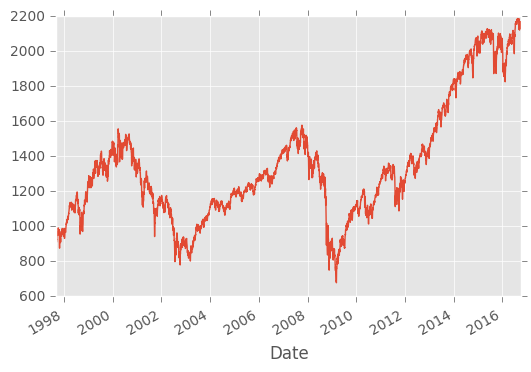

In [13]:
# ok lets just plot this guy
import matplotlib
import matplotlib.pyplot as plt
# use new pretty plots
matplotlib.style.use('ggplot')
# get ipython notebook to show graphs
%pylab inline

es_close.plot()

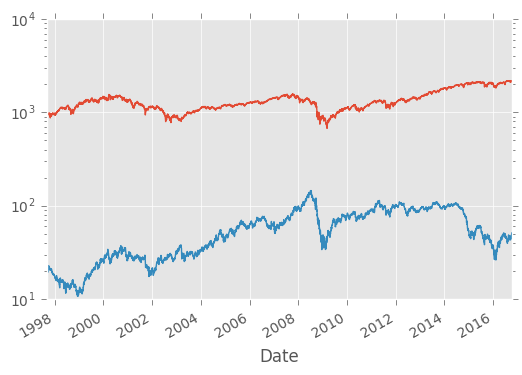

In [15]:
plt.figure()
es_close.plot()
cl_close.plot()
plt.yscale('log')

In [16]:
es['Settle'].corr(cl['Settle'])

0.27989641961133654

In [17]:
import pandas as pd
pd.rolling_corr(es_close, cl_close, window=252).dropna()
# why 252? because that's the number of trading days in a year

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)
  from ipykernel import kernelapp as app


Date
2014-11-21   -0.369646
2014-11-24   -0.386641
2014-11-25   -0.404232
2014-11-26   -0.421947
2014-11-28   -0.441608
2014-12-01   -0.457250
2014-12-02   -0.473815
2014-12-03   -0.488969
2014-12-04   -0.502630
2014-12-05   -0.516329
2014-12-08   -0.526947
2014-12-09   -0.536849
2014-12-10   -0.541803
2014-12-11   -0.548337
2014-12-12   -0.549632
2014-12-15   -0.549979
2014-12-16   -0.546815
2014-12-17   -0.551038
2014-12-18   -0.560348
2014-12-19   -0.569132
2014-12-22   -0.577833
2014-12-23   -0.586649
2014-12-24   -0.594898
2014-12-26   -0.603125
2014-12-29   -0.610925
2014-12-30   -0.617783
2014-12-31   -0.622196
2015-01-02   -0.626952
2015-01-05   -0.628422
2015-01-06   -0.627138
                ...   
2016-08-30    0.593655
2016-08-31    0.600025
2016-09-01    0.604109
2016-09-02    0.609725
2016-09-06    0.616551
2016-09-07    0.621033
2016-09-08    0.626729
2016-09-09    0.632780
2016-09-12    0.637275
2016-09-13    0.640989
2016-09-14    0.643517
2016-09-15    0.646882
2016-0

In [18]:
print(len(cl_close))
print(len(es_close))

4797
4889


In [19]:
merged = pd.concat({'es': es_close, 'cl': cl_close}, axis=1)
# maybe this is the culprit?
merged[merged['cl'].isnull()].head()

,cl,es
Date,,
1997-11-27,NaN,959.50
1997-11-28,NaN,955.00
1998-01-19,NaN,972.25
1998-02-16,NaN,1019.00
1998-05-25,NaN,1116.50


In [20]:
merged.dropna(how='any', inplace=True)
# BAD DATA BEGONE!
merged[merged['cl'].isnull()]

,cl,es
Date,,


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)
  if __name__ == '__main__':


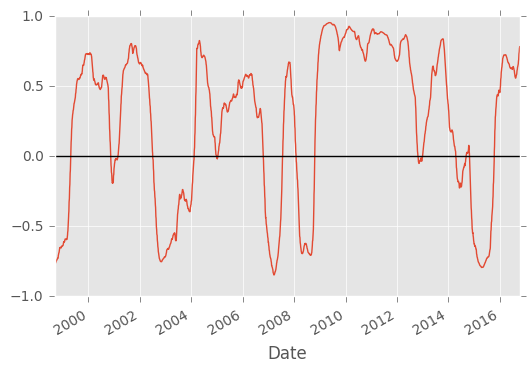

In [21]:
pd.rolling_corr(merged.es, merged.cl, window=252).dropna().plot()
plt.axhline(0, color='k')

In [22]:
# D'oh
import numpy as np
print('Autocorrelation for a random series is {:.3f}'.format(
    pd.Series(np.random.randn(100000)).autocorr())
)
print('But, autocorrelation for S&P is {:3f}'.format(es_close.autocorr()))

Autocorrelation for a random series is -0.001
But, autocorrelation for S&P is 0.998969


/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)
  from ipykernel import kernelapp as app


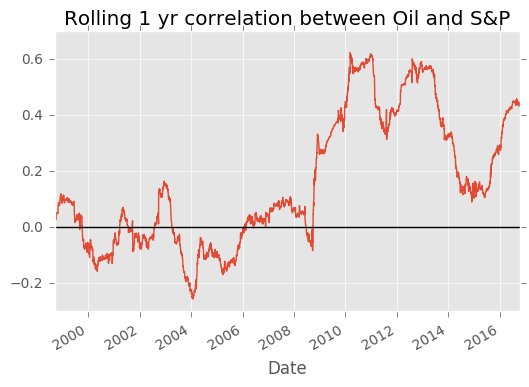

In [23]:
daily_returns = merged.pct_change()
rolling_correlation = pd.rolling_corr(daily_returns.es, daily_returns.cl, window=252).dropna()
rolling_correlation.plot()
plt.axhline(0, color='k')
title('Rolling 1 yr correlation between Oil and S&P')

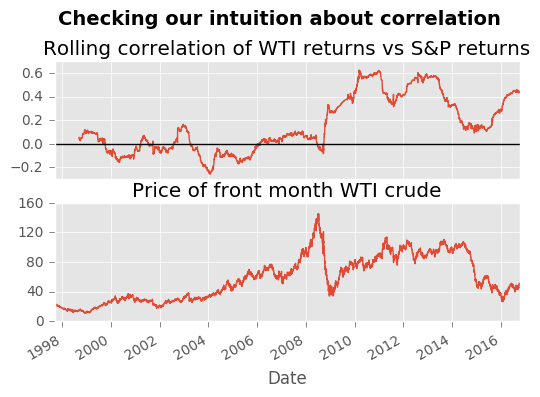

In [24]:
# vertically split into two subplots, and align x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Checking our intuition about correlation', fontsize=14, fontweight='bold')
# make space for the title
fig.subplots_adjust(top=0.85)

rolling_correlation.plot(ax=ax1)
ax1.set_title('Rolling correlation of WTI returns vs S&P returns')
ax1.axhline(0, color='k')
ax1.tick_params(
    which='both',  # both major and minor ticks
    bottom='off', top='off', right='off',
    labelbottom='off'  # labels along the bottom edge are off
)


cl_close.plot(ax=ax2)
ax2.set_title('Price of front month WTI crude')
ax2.tick_params(which='both', top='off', right='off')
ax2.tick_params(which='minor', bottom='off')
ax2.yaxis.set_major_locator(MaxNLocator(5)) # how many ticks